## Sales Performance Analysis


#### Use Case: Retail / E-commerce Business
#### Tools: SQL, Power BI

### Business Problem 

> Retail companies generate massive sales data but struggle to convert it into actionable insights.

#### Business Questions:
1. How are sales trending over time?
2. Which products generate the most revenue?
3. Which regions and categories perform best?
4. Where should the company focus to increase profit?


#### Stakeholders:
1. Business Managers
2. Sales & Marketing Teams
3. Operations Teams

#### Dataset

> Superstore Sales Dataset (Kaggle)

👉 https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

#### 1.Import Libraries

In [1]:
# Importing libraries for data analysis and visualization

import pandas as pd
import matplotlib.pyplot as plt

#### 2. Load Dataset

In [5]:
# Load the dataset
df = pd.read_csv(
    "C:/Users/Nitish/Downloads/sales-performance-analysis/data/superstore_sales.csv",
    encoding="latin1"
)

# Preview data
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### 3. Dataset Overview

In [6]:
# Structure and data types
df.info()

# Summary statistics
df.describe()

# Helps identify date columns, numeric fields, and potential data quality issues.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### 4. Data Cleaning & Date Handling

In [9]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(' ', '_')
)

# Convert Order Date to datetime

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
# Create Year and Month columns
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month


#Time-based analysis is critical in sales analytics, 
# so extracted year and month for trend analysis.

#### 5. Overall Sales & Profit


In [10]:
# Total Sales and Profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

total_sales, total_profit

(2297200.8603000003, 286397.0217)

#### 📊 Insight:

> Total revenue and profitability snapshot of the business.

#### 6. Monthly Sales Trend

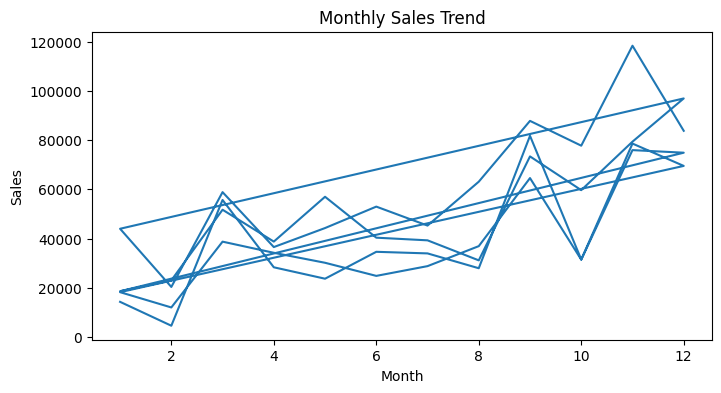

In [11]:

monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

monthly_sales.head()

# Line chart for sales trend
plt.figure(figsize=(8,4))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


##### 🔍 Insight:

> Identifies seasonality and peak sales periods.


##### 💼 Business Use:

> Plan inventory and marketing campaigns around high-sales months.

#### 7. Top 10 Products by Sales

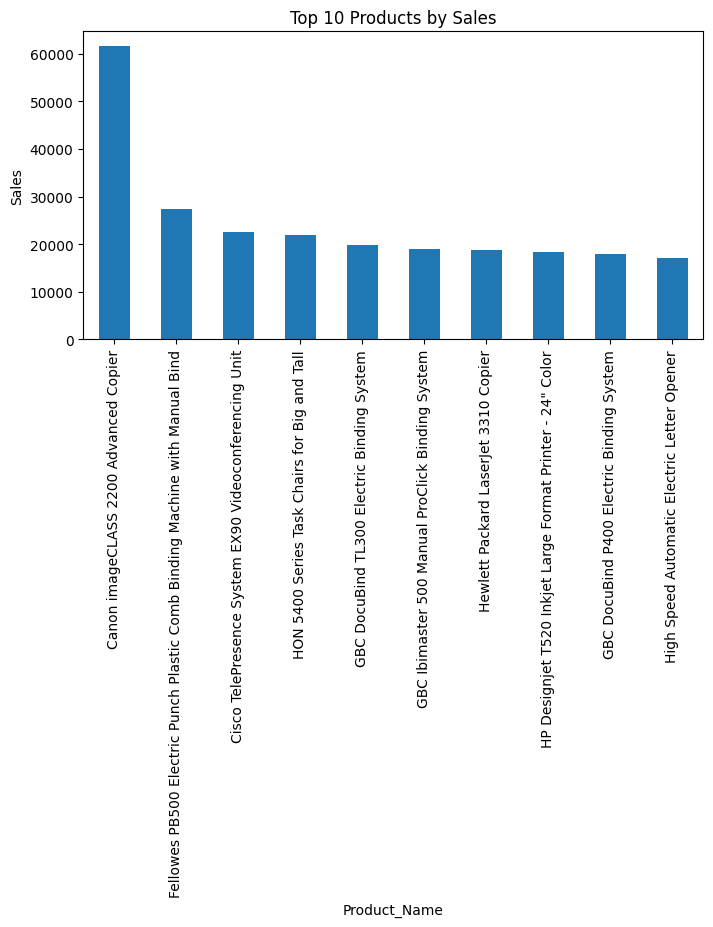

In [12]:
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_products

# Bar chart
plt.figure(figsize=(8,4))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.ylabel("Sales")
plt.show()

#### 🔍 Insight:

> A small set of products drives a large portion of revenue.


#### 💼 Business Action:

> Focus promotions and inventory on high-performing products.

#### 8. Region-wise Sales

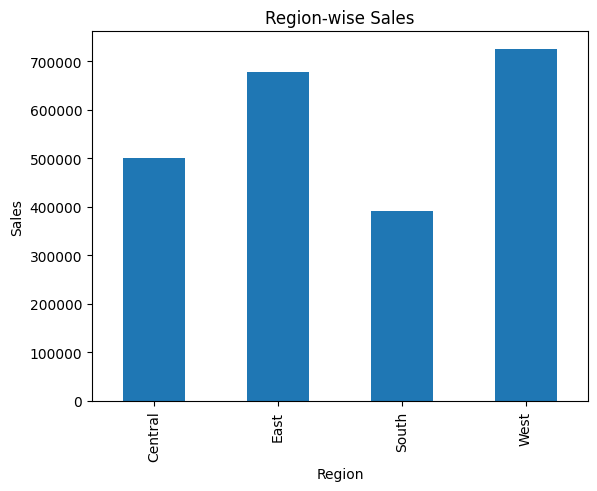

In [13]:

region_sales = df.groupby('Region')['Sales'].sum()

region_sales

region_sales.plot(kind='bar', title="Region-wise Sales")
plt.ylabel("Sales")
plt.show()


#### 🔍 Insight:

> Identifies high and low performing regions.

#### 💼 Business Action:

> Improve marketing or logistics in underperforming regions.

#### 9. Category-wise Performance

In [14]:
category_performance = df.groupby('Category')[['Sales', 'Profit']].sum()

category_performance

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


#### 🔍 Insight:

> Some categories generate high sales but low profit.


#### 💼 Business Decision:

> Profitability matters more than revenue alone.

In [15]:
# Key Insights Summary

print("Key Business Insights:")
print("- Sales show seasonal trends across months")
print("- Top products contribute significantly to total revenue")
print("- Certain regions outperform others")
print("- Category-level profit analysis helps pricing decisions")

Key Business Insights:
- Sales show seasonal trends across months
- Top products contribute significantly to total revenue
- Certain regions outperform others
- Category-level profit analysis helps pricing decisions



#### Recommendations:

1. Increase marketing during peak sales months
2. Prioritize inventory for top-selling products
3. Optimize pricing for low-profit categories
4. Strengthen sales strategy in underperforming regions

